In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [143]:
class Plotter:
    def __init__(self, dataframe):
        """
        Initialize the Plotter class.

        Parameters:
        dataframe (pd.DataFrame): The input dataframe containing data to visualize.
        """
        self.dataframe = dataframe
        self.color_palette = sns.color_palette("viridis")
        sns.set_palette(self.color_palette)
        sns.set_style("whitegrid")

    def scatterplot(self, x, y, figsize=(8,6), hue=None):
        """Create a scatterplot."""
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue)
        plt.title(f"Scatterplot of {x} vs {y}")
        plt.show()

    def histogram(self, column, figsize=(8, 6), bins=25):
        """Create a histogram."""
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True)
        plt.title(f"Histogram of {column}")
        plt.show()

    def barplot(self, x, y, hue=None, figsize=(12,6)):
         plt.figure(figsize=figsize)  # Increase width for better spacing
         sns.barplot(data=self.dataframe, x=x, y=y, hue=hue)
         plt.title(f"Barplot of {y} by {x}")
         plt.xticks(rotation=45)  # Rotate x-axis labels
         plt.tight_layout()  # Adjust layout to fit everything
         plt.show()
    
    def violinplot(self, x, y, hue=None, figsize=(12, 6), inner="box"):
       plt.figure(figsize=figsize)
       sns.violinplot(data=self.dataframe, x=x, y=y, hue=hue, inner=inner)
       plt.title(f"Violin Plot of {y} by {x}")
       plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
       plt.tight_layout()  # Adjust layout to fit everything
       plt.show()


    def boxplot(self, x, y, hue=None, figsize=(12, 6), box_width=0.5):
        plt.figure(figsize=figsize)  # Allow customization of figure size
        sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width)  # Control box width
        plt.title(f"Boxplot of {y} by {x}")
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.tight_layout()  # Adjust layout
        plt.show()


    def stripplot(self, x, y, figsize=(8, 6), hue=None):
        """Create a strip plot."""
        plt.figure(figsize=figsize)
        sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True)
        plt.title(f"Stripplot of {y} by {x}")
        plt.show()

    def jointplot(self, x, y, kind="scatter", height=6, hue=None, legend_fontsize=10):
        """Create a joint plot."""
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, hue=hue, 
                          palette=self.color_palette, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_  #
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()
    
    def jointplotkde(self, x, y, kind="kde", hue=None, height=(6), cmap="viridis", legend_fontsize=10):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, 
                          cmap=cmap, hue=hue, fill=True, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_ 
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def pairplot(self, hue=None):
        """Create a pair plot."""
        sns.pairplot(self.dataframe, hue=hue, palette=self.color_palette)
        plt.suptitle("Pairplot", y=1.02)
        plt.show()

    def heatmap(self, figsize=(10, 8)):
        """Create a heatmap of the correlation matrix."""
        # Drop non-numeric columns for correlation calculation
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        plt.figure(figsize=figsize)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
        plt.title("Heatmap of Correlation Matrix")
        plt.show()

    def clustermap(self, figsize=(10, 8)):
        """Create a cluster map of the correlation matrix."""
        # Drop non-numeric columns for correlation calculation
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        corr = numeric_df.corr()
        sns.clustermap(corr, annot=True, cmap="viridis", fmt=".2f", figsize=figsize)
        plt.show()
    
    def nulls_barplot(self, figsize=(8, 6)):
        total_nulls = self.dataframe.isna().sum().sum()  
        total_values = self.dataframe.size - total_nulls 
        data = pd.DataFrame({
        "Dcontent": ["Nulls", "Values"],
        "Count": [total_nulls, total_values]
         })
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x="Dcontent", y="Count", hue="Dcontent", palette=["red", "green"],)
        plt.title("Total Nulls vs Total Values")
        plt.ylabel("Count")
        plt.xlabel("")
        plt.show()
    

In [144]:
class DataTransform:
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.df = df

    def change_dtypes(self, dtype_dict):
        try:
            for column, dtype in dtype_dict.items():
                if column in self.df.columns:
                    if dtype == "datetime64":
                        self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
                    elif dtype == "boolean":
                        self.df[column] = self.df[column].map({'y': True, 'n': False})
                    else:
                        self.df[column] = self.df[column].astype(dtype, errors='ignore')
                else:
                    raise KeyError(f"Column '{column}' not found in DataFrame.")
            return self.df
        except Exception as e:
            raise RuntimeError(f"Error whilst changing datatypes: {e}")

if __name__ == "__main__":
    df_og = pd.read_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df5_outrem.csv")

    transformer = DataTransform(df_og)

    dtype_dict = {
        "id": "int64",
        "member_id": "int64",
        "loan_amount": "float64",
        "funded_amount": "float64",
        "funded_amount_inv": "float64",
        "term": "category",
        "int_rate": "float64",
        "instalment": "float64",
        "grade": "category",
        "sub_grade": "category",
        "employment_length": "category",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "issue_date": "datetime64",
        "loan_status": "category",
        "payment_plan": "bool",
        "purpose": "category",
        "dti": "float64",
        "delinq_2yrs": "int64",
        "earliest_credit_line": "datetime64",
        "inq_last_6mths": "int64",
        "open_accounts": "int64",
        "total_accounts": "int64",
        "out_prncp": "float64",
        "out_prncp_inv": "float64",
        "total_payment": "float64",
        "total_payment_inv": "float64",
        "total_rec_prncp": "float64",
        "total_rec_int": "float64",
        "total_rec_late_fee": "float64",
        "recoveries": "float64",
        "collection_recovery_fee": "float64",
        "last_payment_date": "datetime64",
        "last_payment_amount": "float64",
        "last_credit_pull_date": "datetime64",
        "collections_12_mths_ex_med": "category",
        "policy_code": "int64",
        "application_type": "category"
    }

    df_t6 = transformer.change_dtypes(dtype_dict)

    print("\nTransformed DataFrame dtypes:\n")
    dtype_df = pd.DataFrame({"Columns" : df_t6.columns, "Dtype" : df_t6.dtypes}).reset_index(drop=True)
    print(dtype_df.sort_values("Columns").reset_index(drop=True))


Transformed DataFrame dtypes:

                       Columns           Dtype
0                   Unnamed: 0           int64
1                   annual_inc         float64
2             application_type        category
3      collection_recovery_fee         float64
4   collections_12_mths_ex_med        category
5                  delinq_2yrs           int64
6                          dti         float64
7         earliest_credit_line  datetime64[ns]
8            employment_length        category
9                funded_amount         float64
10           funded_amount_inv         float64
11                       grade        category
12              home_ownership        category
13                          id           int64
14              inq_last_6mths           int64
15                  instalment         float64
16                    int_rate         float64
17                  issue_date  datetime64[ns]
18       last_credit_pull_date  datetime64[ns]
19         last_payment_amou

In [145]:

df_t6_num = df_t6.select_dtypes(include=[np.number])


df_t6_corr_matrix = df_t6_num.corr()


print("Correlation Matrix:")
print(df_t6_corr_matrix)


Correlation Matrix:
                         Unnamed: 0        id  member_id  loan_amount  \
Unnamed: 0                 1.000000 -0.914610  -0.932207    -0.176579   
id                        -0.914610  1.000000   0.964794     0.197086   
member_id                 -0.932207  0.964794   1.000000     0.197671   
loan_amount               -0.176579  0.197086   0.197671     1.000000   
funded_amount             -0.188223  0.208886   0.209617     0.965831   
funded_amount_inv         -0.217362  0.235906   0.235597     0.987089   
int_rate                  -0.172514  0.218590   0.202855     0.100108   
instalment                -0.218856  0.251440   0.247791     0.936864   
annual_inc                -0.068252  0.073471   0.072851     0.398356   
dti                       -0.180504  0.209804   0.193494     0.100116   
delinq_2yrs                     NaN       NaN        NaN          NaN   
inq_last_6mths                  NaN       NaN        NaN          NaN   
open_accounts             -0.13

In [146]:
plotter = Plotter(df_t6_num)

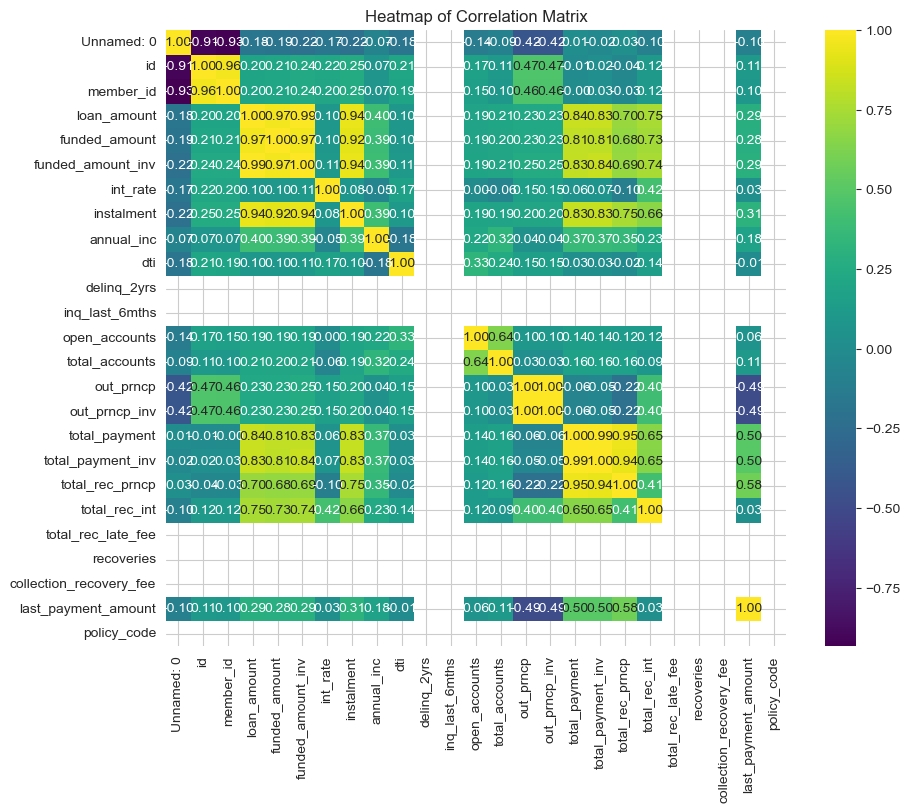

In [147]:
plotter.heatmap()

In [148]:

corr_mask = (df_t6_corr_matrix.abs() > 0.9) & (df_t6_corr_matrix != 1)


df_t6_highly_corr_pairs = corr_mask.stack()

# Filter pairs that are True (i.e., highly correlated)
df_t6_highly_corr_pairs = df_t6_highly_corr_pairs[df_t6_highly_corr_pairs].index
df_t6_highly_corr_pairs = df_t6_highly_corr_pairs.drop("id")
df_t6_highly_corr_pairs = df_t6_highly_corr_pairs.drop("member_id")
df_t6_highly_corr_pairs = df_t6_highly_corr_pairs.drop("Unnamed: 0")



# Display the results
print("correlation > 0.9):")
print("\r")
for col1, col2 in df_t6_highly_corr_pairs:
    print(f"{col1} & {col2}")


correlation > 0.9):

loan_amount & funded_amount
loan_amount & funded_amount_inv
loan_amount & instalment
funded_amount & loan_amount
funded_amount & funded_amount_inv
funded_amount & instalment
funded_amount_inv & loan_amount
funded_amount_inv & funded_amount
funded_amount_inv & instalment
instalment & loan_amount
instalment & funded_amount
instalment & funded_amount_inv
out_prncp & out_prncp_inv
out_prncp_inv & out_prncp
total_payment & total_payment_inv
total_payment & total_rec_prncp
total_payment_inv & total_payment
total_payment_inv & total_rec_prncp
total_rec_prncp & total_payment
total_rec_prncp & total_payment_inv


In [149]:
print(df_t6_highly_corr_pairs)

MultiIndex([(      'loan_amount',     'funded_amount'),
            (      'loan_amount', 'funded_amount_inv'),
            (      'loan_amount',        'instalment'),
            (    'funded_amount',       'loan_amount'),
            (    'funded_amount', 'funded_amount_inv'),
            (    'funded_amount',        'instalment'),
            ('funded_amount_inv',       'loan_amount'),
            ('funded_amount_inv',     'funded_amount'),
            ('funded_amount_inv',        'instalment'),
            (       'instalment',       'loan_amount'),
            (       'instalment',     'funded_amount'),
            (       'instalment', 'funded_amount_inv'),
            (        'out_prncp',     'out_prncp_inv'),
            (    'out_prncp_inv',         'out_prncp'),
            (    'total_payment', 'total_payment_inv'),
            (    'total_payment',   'total_rec_prncp'),
            ('total_payment_inv',     'total_payment'),
            ('total_payment_inv',   'total_rec_p

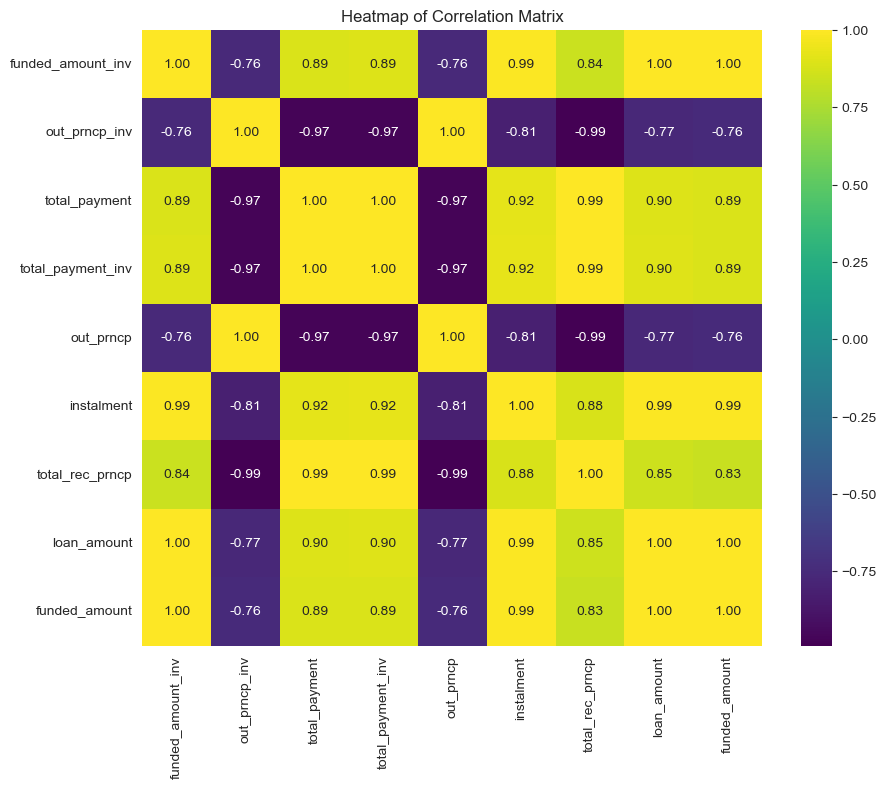

In [16]:

columns_to_keep = set()
for pair in df_t6_highly_corr_pairs:
    for col in pair:
        columns_to_keep.add(col)

df_t6_corr_cols = df_t6_num[list(columns_to_keep)]

df_t6_filtered_corr_matrix = df_t6_corr_cols.corr()


corr_plotter = Plotter(df_t6_filtered_corr_matrix)

corr_plotter.heatmap()


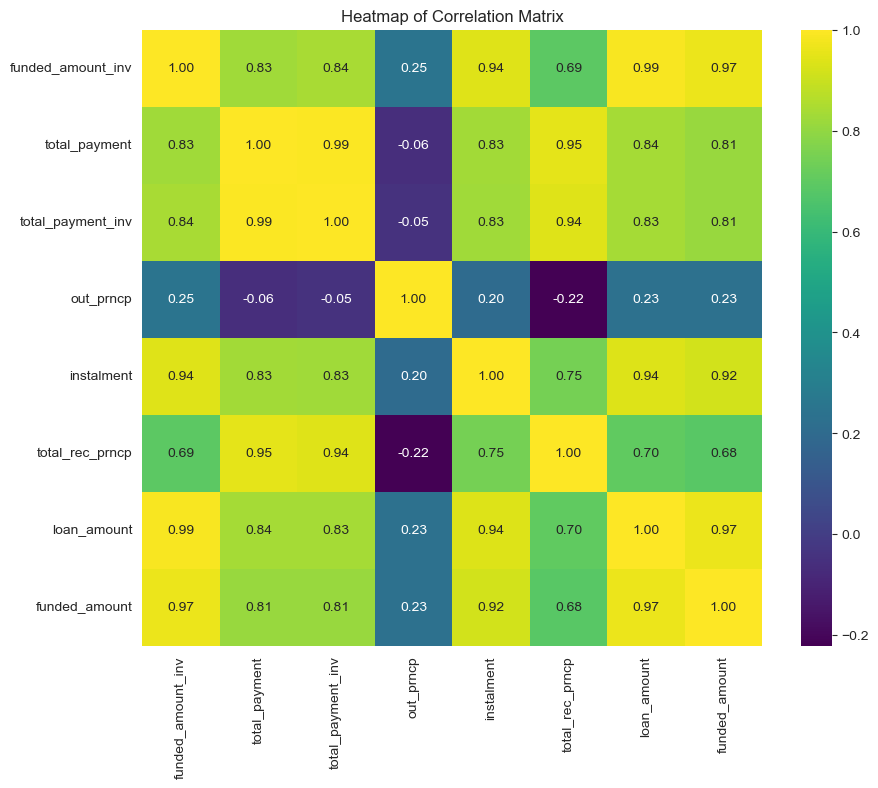

In [21]:
df_t6_corr_cols_dropped1 = df_t6_corr_cols.drop(columns="out_prncp_inv")

df_t6_corr_matrix_dropped1 = df_t6_corr_cols_dropped1.corr()

corr_plotter1 = Plotter(df_t6_corr_cols_dropped1)

corr_plotter1.heatmap()

In [22]:
print("Correlation Matrix Before Stacking:")
print(df_t6_corr_matrix_dropped1)


Correlation Matrix Before Stacking:
                   funded_amount_inv  total_payment  total_payment_inv  \
funded_amount_inv           1.000000       0.825796           0.838956   
total_payment               0.825796       1.000000           0.990741   
total_payment_inv           0.838956       0.990741           1.000000   
out_prncp                   0.247068      -0.059921          -0.046701   
instalment                  0.938705       0.830390           0.827434   
total_rec_prncp             0.692773       0.948447           0.938221   
loan_amount                 0.987089       0.836621           0.834038   
funded_amount               0.965247       0.812349           0.810851   

                   out_prncp  instalment  total_rec_prncp  loan_amount  \
funded_amount_inv   0.247068    0.938705         0.692773     0.987089   
total_payment      -0.059921    0.830390         0.948447     0.836621   
total_payment_inv  -0.046701    0.827434         0.938221     0.834038   
o

In [ ]:
df_t6_corr_cols_dropped1_stack = df_t6_corr_matrix_dropped1.stack()

df_t6_corr_cols_drpd1_stkd_filt = df_t6_corr_cols_dropped1_stack[
    (df_t6_corr_cols_dropped1_stack.abs() > 0.9) & (df_t6_corr_cols_dropped1_stack != 1)
]

print("correlation > 0.9):")
print("\r")
print(df_t6_corr_cols_drpd1_stkd_filt)


correlation > 0.9):

funded_amount_inv  instalment           0.938705
                   loan_amount          0.987089
                   funded_amount        0.965247
total_payment      total_payment_inv    0.990741
                   total_rec_prncp      0.948447
total_payment_inv  total_payment        0.990741
                   total_rec_prncp      0.938221
instalment         funded_amount_inv    0.938705
                   loan_amount          0.936864
                   funded_amount        0.918330
total_rec_prncp    total_payment        0.948447
                   total_payment_inv    0.938221
loan_amount        funded_amount_inv    0.987089
                   instalment           0.936864
                   funded_amount        0.965831
funded_amount      funded_amount_inv    0.965247
                   instalment           0.918330
                   loan_amount          0.965831
dtype: float64


In [ ]:
df_t6_corr_cols_dropped2 = df_t6_corr_cols_dropped1.drop(columns="out_prncp") #removed for clarity, will not be removed from final df

print(df_t6_corr_cols_dropped2)

       funded_amount_inv  total_payment  total_payment_inv  instalment  \
0               16000.00        6220.99            6220.99      519.97   
1               12000.00        2960.50            2960.50      247.19   
2               15000.00        6099.63            6099.63      510.20   
3                8950.00        3866.40            3866.40      322.94   
4               20000.00        5430.65            5430.65      454.96   
...                  ...            ...                ...         ...   
32977             950.00        1457.54            1153.83       40.51   
32978              25.00        4256.33              29.56      118.24   
32979            1369.99        9503.91            1596.51      263.97   
32980            3075.00        5675.36            3635.77      157.66   
32981            3575.00        4474.19            3998.81      124.31   

       total_rec_prncp  loan_amount  funded_amount  
0              4787.06      16000.0        16000.0  
1    

In [155]:

class RotationalRegression:
    def __init__(self, dataframe):
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.dataframe = dataframe

    def run_regression(self, target, predictors):
        
        X = self.dataframe[predictors]
        y = self.dataframe[target]

        X_const = sm.add_constant(X)

        model = sm.OLS(y, X_const).fit()

        results = {
            "Coefficients": model.params.to_dict(),
            "P_values": model.pvalues.to_dict(),
            "R_squared": model.rsquared,
            "Adjusted_R_squared": model.rsquared_adj,
            "Summary": model.summary()
        }
        return results

    def calculate_vif(self, predictors):

        X = self.dataframe[predictors]
        X_const = sm.add_constant(X)
        vif_data = pd.DataFrame()
        vif_data["Variable"] = predictors
        vif_data["VIF"] = [
            variance_inflation_factor(X_const.values, i + 1)
            for i in range(len(predictors))
        ]
        return vif_data

    def rotational_analysis(self, group_columns):
    
        results = []
        for target in group_columns:
            predictors = [col for col in group_columns if col != target]
            regression_result = self.run_regression(target, predictors)
            vif_result = self.calculate_vif(predictors)
            print("\r")
            results.append({
                "Target": target,
                "Predictors": predictors,
                "Regression": regression_result,
                "VIF": vif_result
            })
        return results
    
    def generate_summary_table(self, group_columns):
  
      summary_data = []  # List to store summary results
      analysis_results = self.rotational_analysis(group_columns)  # Perform rotational analysis

      for result in analysis_results:
        target = result["Target"]  # Current target variable
        predictors = result["Predictors"]  # Predictors for this target
        p_values = result["Regression"]["P_values"]  # P-values from regression
        vif_data = result["VIF"]  # VIF data for predictors

        # Collect summary for each predictor
        target_vif_values = []  # List to collect VIF values for this target
        target_p_values = []  # List to collect p-values for this target

        for predictor in predictors:
            vif_value = vif_data.loc[vif_data["Variable"] == predictor, "VIF"].iloc[0]
            p_value = p_values[predictor]
            target_vif_values.append(vif_value)
            target_p_values.append(p_value)

            # Append individual predictor's results to summary
            summary_data.append({
                "Target": target,
                "Predictor": predictor,
                "P_value": p_value,
                "VIF": vif_value
            })

        # Calculate mean p-value and VIF for the current target
        mean_vif = np.mean(target_vif_values)
        mean_p_value = np.mean(target_p_values)

        # Add the mean values as a summary row for this target
        summary_data.append({
            "Target": target,
            "Predictor": "Mean (All Predictors)",
            "P_value": mean_p_value,
            "VIF": mean_vif
        })

    # Convert results into a DataFrame for easier analysis
      return pd.DataFrame(summary_data)




In [76]:
corr_group1 = ["instalment", "loan_amount", "funded_amount", "funded_amount_inv"] 

corr_group2 = ["total_payment" , "total_payment_inv" , "total_rec_prncp"] 
                   

In [151]:
corr_analysis = RotationalRegression(df_t6_corr_cols_dropped2)

In [152]:
corr_analysis.generate_summary_table(corr_group1)

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_22519/914954197.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vif_value = float(vif_data[vif_data["Variable"] == predictor]["VIF"])


,Target,Predictor,P_value,VIF
0,instalment,loan_amount,2.581573e-171,43.172904
1,instalment,funded_amount,4.328868e-52,16.216721
2,instalment,funded_amount_inv,0.000000e+00,42.460348
3,instalment,Mean (All Predictors),1.442956e-52,33.949991
4,loan_amount,instalment,2.581573e-171,8.573654
5,loan_amount,funded_amount,0.000000e+00,14.917313
6,loan_amount,funded_amount_inv,0.000000e+00,19.667031
7,loan_amount,Mean (All Predictors),8.605243e-172,14.386000
8,funded_amount,instalment,4.328868e-52,8.717274
9,funded_amount,loan_amount,0.000000e+00,40.378811


In [156]:

corr_analysis_g1mean = corr_analysis.generate_summary_table(corr_group1)


corr_analyis_g1mean = corr_analysis_g1mean[corr_analysis_g1mean["Predictor"] == "Mean (All Predictors)"]


print(corr_analysis_g1mean)






               Target              Predictor        P_value        VIF
0          instalment            loan_amount  2.581573e-171  43.172904
1          instalment          funded_amount   4.328868e-52  16.216721
2          instalment      funded_amount_inv   0.000000e+00  42.460348
3          instalment  Mean (All Predictors)   1.442956e-52  33.949991
4         loan_amount             instalment  2.581573e-171   8.573654
5         loan_amount          funded_amount   0.000000e+00  14.917313
6         loan_amount      funded_amount_inv   0.000000e+00  19.667031
7         loan_amount  Mean (All Predictors)  8.605243e-172  14.386000
8       funded_amount             instalment   4.328868e-52   8.717274
9       funded_amount            loan_amount   0.000000e+00  40.378811
10      funded_amount      funded_amount_inv   0.000000e+00  41.551909
11      funded_amount  Mean (All Predictors)   1.442956e-52  30.215998
12  funded_amount_inv             instalment   0.000000e+00   8.362542
13

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_22519/914954197.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vif_value = float(vif_data[vif_data["Variable"] == predictor]["VIF"])


In [157]:
corr_analysis.generate_summary_table(corr_group2)

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_22519/914954197.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vif_value = float(vif_data[vif_data["Variable"] == predictor]["VIF"])


,Target,Predictor,P_value,VIF
0,total_payment,total_payment_inv,0.000000e+00,8.351346
1,total_payment,total_rec_prncp,0.000000e+00,8.351346
2,total_payment,Mean (All Predictors),0.000000e+00,8.351346
3,total_payment_inv,total_payment,0.000000e+00,9.955317
4,total_payment_inv,total_rec_prncp,1.094465e-09,9.955317
5,total_payment_inv,Mean (All Predictors),5.472327e-10,9.955317
6,total_rec_prncp,total_payment,0.000000e+00,54.251641
7,total_rec_prncp,total_payment_inv,1.094465e-09,54.251641
8,total_rec_prncp,Mean (All Predictors),5.472327e-10,54.251641


In [158]:
corr_analysis_g2mean = corr_analysis.generate_summary_table(corr_group2)


corr_analysis_g2mean = corr_analysis_g2mean[corr_analysis_g2mean["Predictor"] == "Mean (All Predictors)"]


print(corr_analysis_g2mean)






              Target              Predictor       P_value        VIF
2      total_payment  Mean (All Predictors)  0.000000e+00   8.351346
5  total_payment_inv  Mean (All Predictors)  5.472327e-10   9.955317
8    total_rec_prncp  Mean (All Predictors)  5.472327e-10  54.251641


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_22519/914954197.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vif_value = float(vif_data[vif_data["Variable"] == predictor]["VIF"])


In [159]:

df_t6_corr_grp1 = df_t6_corr_cols_dropped2.drop(columns=["total_payment", "total_payment_inv", "total_rec_prncp"])

df_t6_corr_grp2 = df_t6_corr_cols_dropped2.drop(columns=["instalment", "loan_amount", "funded_amount", "funded_amount_inv"])


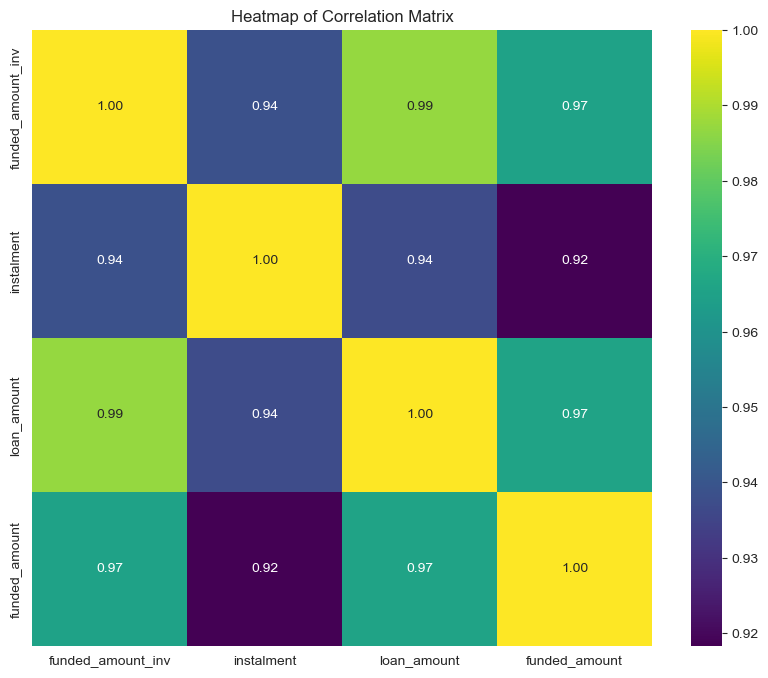

In [160]:
group1_only = Plotter(df_t6_corr_grp1)

group1_only.heatmap()

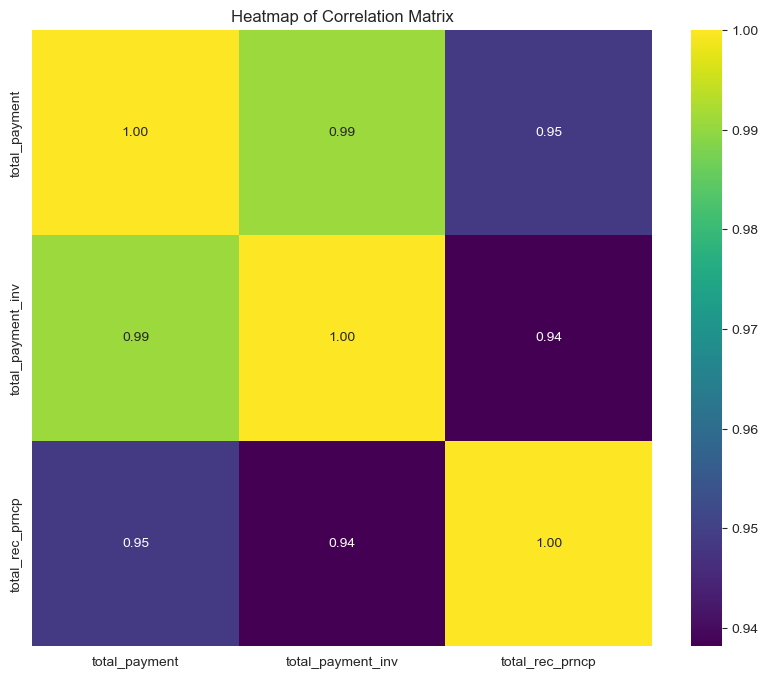

In [161]:
group2_only = Plotter(df_t6_corr_grp2)

group2_only.heatmap()

In [162]:
df_t6_grp1_drpd1 = df_t6_corr_grp1.drop(columns="funded_amount_inv")

df_t6_grp1_drpd2 = df_t6_corr_grp2.drop(columns="total_rec_prncp") 
                          

In [163]:
plotter_grp1 = Plotter(df_t6_grp1_drpd1)

plotter_grp2 = Plotter(df_t6_grp1_drpd2)

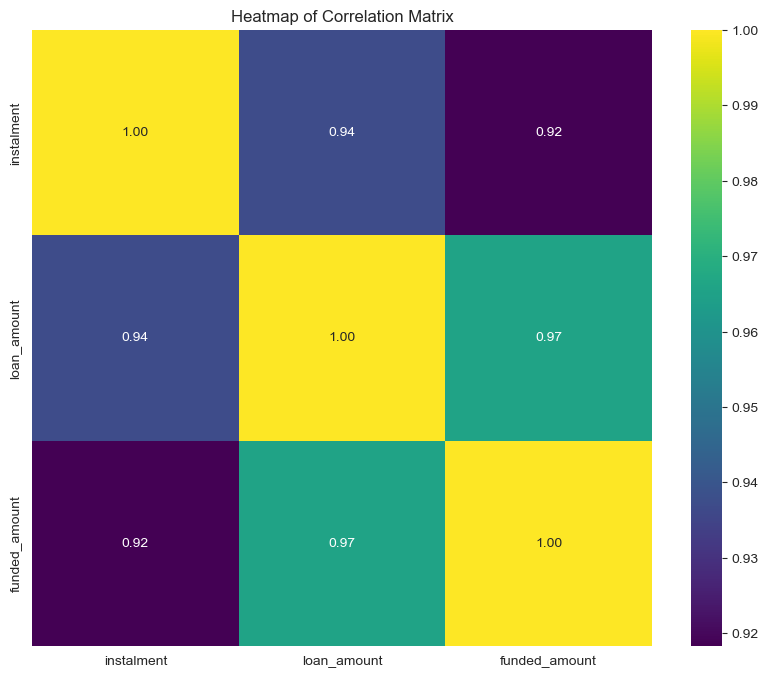

In [164]:
plotter_grp1.heatmap()

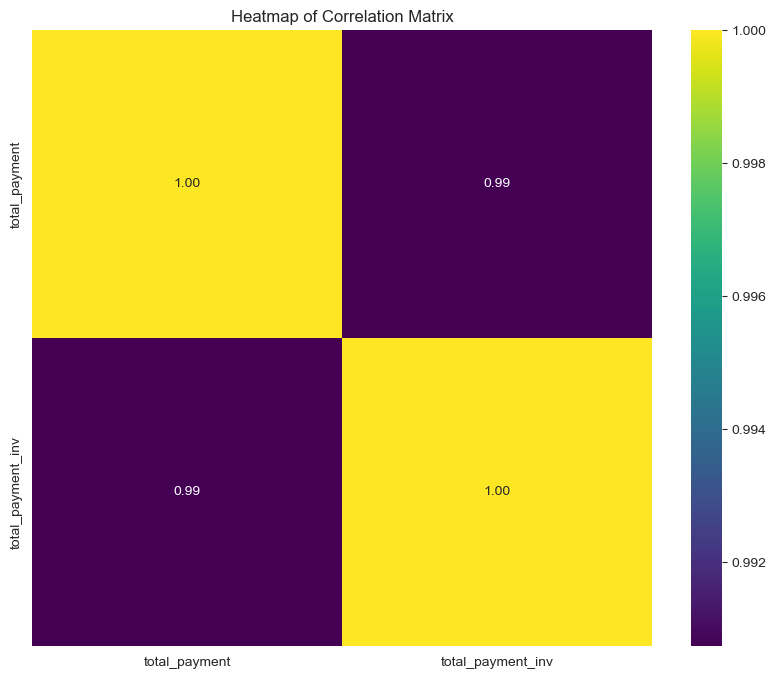

In [165]:
plotter_grp2.heatmap()

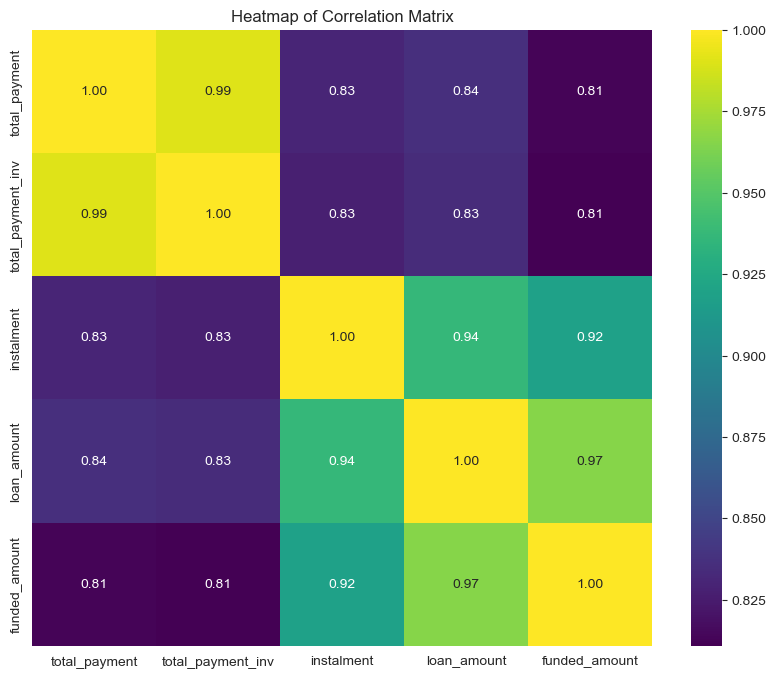

In [167]:
df_t6_corr_cols_dropped4 = df_t6_corr_cols_dropped2.drop(columns=["funded_amount_inv", "total_rec_prncp"])

plotter_dropped4 = Plotter(df_t6_corr_cols_dropped4)

plotter_dropped4.heatmap()

In [168]:
corr_analysis_2 = RotationalRegression(df_t6_corr_cols_dropped4) 

corr2_group1 = ["instalment", "loan_amount", "funded_amount"] 

corr2_group2 = ["total_payment" , "total_payment_inv"] 


In [169]:
corr_analysis_2.generate_summary_table(corr2_group1) 

,Target,Predictor,P_value,VIF
0,instalment,loan_amount,0.000000e+00,14.887292
1,instalment,funded_amount,2.076023e-162,14.887292
2,instalment,Mean (All Predictors),1.038012e-162,14.887292
3,loan_amount,instalment,0.000000e+00,6.382858
4,loan_amount,funded_amount,0.000000e+00,6.382858
5,loan_amount,Mean (All Predictors),0.000000e+00,6.382858
6,funded_amount,instalment,2.076023e-162,8.177601
7,funded_amount,loan_amount,0.000000e+00,8.177601
8,funded_amount,Mean (All Predictors),1.038012e-162,8.177601


In [172]:


corr2_analysis_g1mean = corr_analysis.generate_summary_table(corr2_group1)


corr2_analysis_g1mean = corr2_analysis_g1mean[corr2_analysis_g1mean["Predictor"] == "Mean (All Predictors)"]


print(corr2_analysis_g1mean)




          Target              Predictor        P_value        VIF
2     instalment  Mean (All Predictors)  1.038012e-162  14.887292
5    loan_amount  Mean (All Predictors)   0.000000e+00   6.382858
8  funded_amount  Mean (All Predictors)  1.038012e-162   8.177601


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_22519/914954197.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vif_value = float(vif_data[vif_data["Variable"] == predictor]["VIF"])


In [173]:
corr_analysis_2.generate_summary_table(corr2_group2) 

,Target,Predictor,P_value,VIF
0,total_payment,total_payment_inv,0.0,1.0
1,total_payment,Mean (All Predictors),0.0,1.0
2,total_payment_inv,total_payment,0.0,1.0
3,total_payment_inv,Mean (All Predictors),0.0,1.0


In [174]:
corr2_analysis_g2mean = corr_analysis.generate_summary_table(corr2_group2)


corr2_analysis_g2mean = corr2_analysis_g2mean[corr2_analysis_g2mean["Predictor"] == "Mean (All Predictors)"]


print(corr2_analysis_g2mean)



              Target              Predictor  P_value  VIF
1      total_payment  Mean (All Predictors)      0.0  1.0
3  total_payment_inv  Mean (All Predictors)      0.0  1.0


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_22519/914954197.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vif_value = float(vif_data[vif_data["Variable"] == predictor]["VIF"])


In [175]:
df_t6_corr_cols_dropped5 = df_t6_corr_cols_dropped4.drop(columns="total_payment_inv")

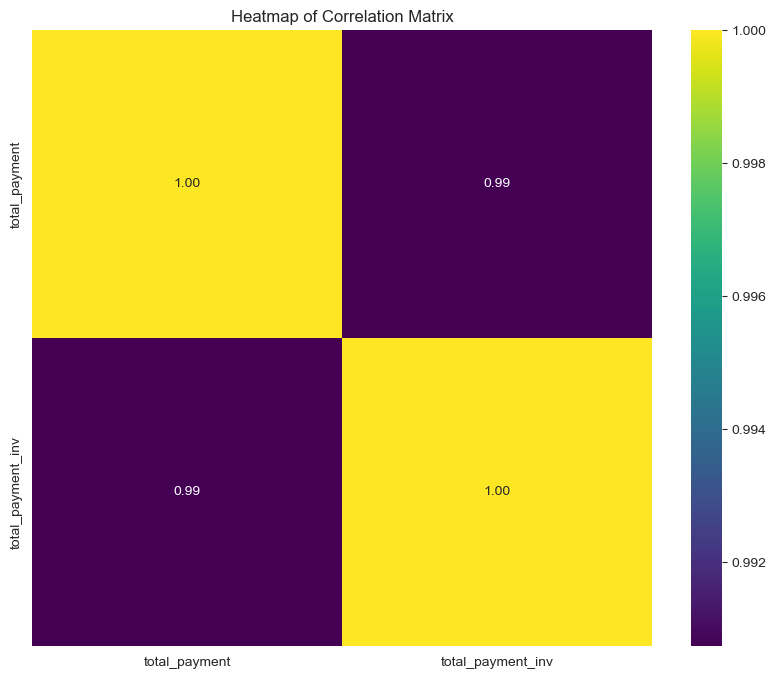

In [176]:
df_t6_grp1_drp2 = df_t6_grp1_drpd1.drop(columns="instalment")

plotter_grp1_drpd2 = Plotter(df_t6_grp1_drpd2)

plotter_grp1_drpd2.heatmap()

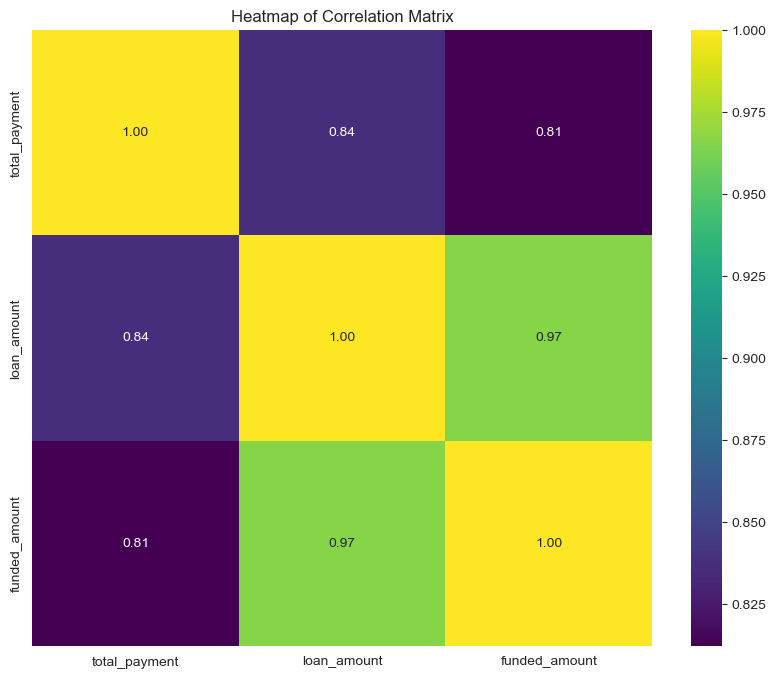

In [177]:
df_t6_corr_cols_dropped6 = df_t6_corr_cols_dropped5.drop(columns="instalment")

plotter_drpd6 = Plotter(df_t6_corr_cols_dropped6)

plotter_drpd6.heatmap()

In [178]:
group_1_last2 = ["loan_amount", "funded_amount"]

test_group1 = RotationalRegression(df_t6_corr_cols_dropped6)

test_group1.generate_summary_table(group_1_last2)

,Target,Predictor,P_value,VIF
0,loan_amount,funded_amount,0.0,1.0
1,loan_amount,Mean (All Predictors),0.0,1.0
2,funded_amount,loan_amount,0.0,1.0
3,funded_amount,Mean (All Predictors),0.0,1.0


In [181]:
df_t6_fin = df_t6_corr_cols_dropped6.drop(columns="funded_amount")

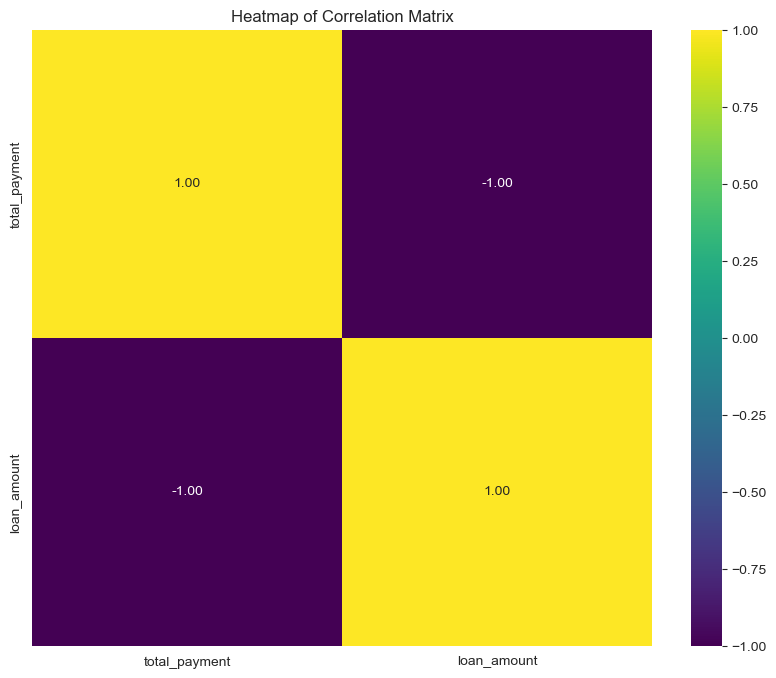

In [184]:
 tf_t6_fin_corr_matrix = df_t6_fin.corr() 

plotter_fin = Plotter(tf_t6_fin_corr_matrix )

plotter_fin.heatmap()

List of columns I need to drop:

out_prncp_inv,
instalment,
funded_amount,
funded_amount_inv,
total_payment_inv,
total_rec_prncp,



In [187]:
print(corr_group1)
print(corr_group2)

['instalment', 'loan_amount', 'funded_amount', 'funded_amount_inv']
['total_payment', 'total_payment_inv', 'total_rec_prncp']


In [ ]:
tf_t6_corr_drpd = df_t6.drop(columns=d["out_prncp_inv", "instalment", "funded_amount", "funded_amount_inv", "total_payment_inv", "total_rec_prncp"])

In [190]:
df_t6_corr_drpd.to_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df6_corr_drpd.csv")